Die häufigsten Differenzen sind (mit Toleranz):
1.91e-17 C kommt 13 mal vor
7.91e-17 C kommt 11 mal vor
4.00e-19 C kommt 10 mal vor
3.02e-17 C kommt 10 mal vor
5.20e-18 C kommt 9 mal vor


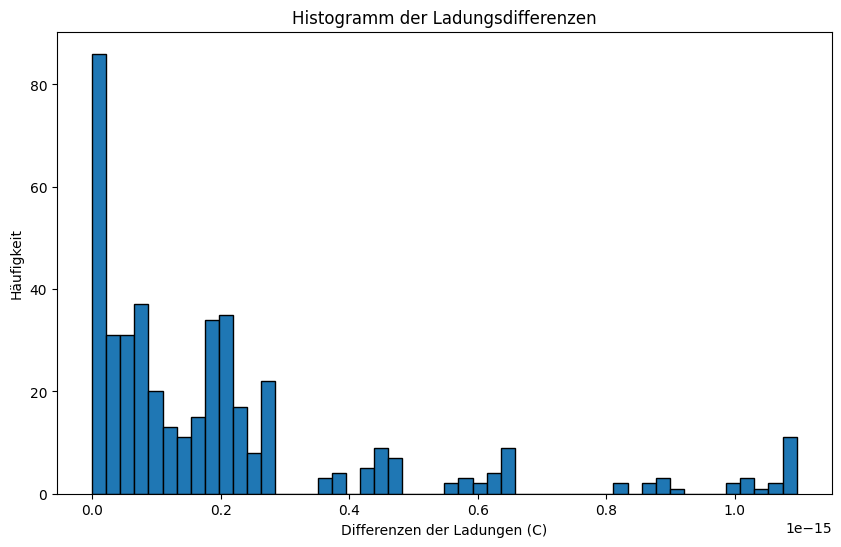


Geschätzte Elementarladung e ≈ 1.91e-17 C


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Deine Ladungswerte in Coulomb
ladungen = np.array([
    0.00000000000000001636,
	0.00000000000000000578,
	0.00000000000000028690,
	0.00000000000000004627,
	0.00000000000000002638,
	0.00000000000000001063,
	0.00000000000000010426,
	0.00000000000000010483,
	0.00000000000000000578,
	0.00000000000000008501,
	0.00000000000000022409,
	0.00000000000000028768,
	0.00000000000000021100,
	0.00000000000000008501,
	0.00000000000000005521,
	0.00000000000000002117,
	0.00000000000000000808,
	0.00000000000000019492,
	0.00000000000000065967,
	0.00000000000000110169,
	0.00000000000000008452,
	0.00000000000000020328,
	0.00000000000000024181,
	0.00000000000000022916,
	0.00000000000000047684,
	0.00000000000000000539,
	0.00000000000000002449,
	0.00000000000000002053,
	0.00000000000000001765,
	0.00000000000000003564

])

# Sortieren der Ladungswerte
ladungen_sortiert = np.sort(ladungen)

# Berechnen der Differenzen zwischen allen Paaren
differenzen = []
for i in range(len(ladungen_sortiert)):
    for j in range(i + 1, len(ladungen_sortiert)):
        diff = ladungen_sortiert[j] - ladungen_sortiert[i]
        differenzen.append(diff)

# Umwandlung in ein Numpy-Array
differenzen = np.array(differenzen)

# Rundung der Differenzen (z.B. auf 1e-18 Coulomb)
rundung = 1e-19
differenzen_gerundet = np.round(differenzen / rundung) * rundung

# Toleranzgrenze für die Gruppierung
toleranz = 1e-18

# Gruppierung mit Toleranz
gruppierte_differenzen = Counter()
for diff in differenzen_gerundet:
    gruppiert = False
    for key in list(gruppierte_differenzen.keys()):
        if abs(diff - key) <= toleranz:
            gruppierte_differenzen[key] += 1
            gruppiert = True
            break
    if not gruppiert:
        gruppierte_differenzen[diff] += 1

# Häufigste Differenzen finden
häufigste_differenzen = gruppierte_differenzen.most_common()

# Anzeige der häufigsten Differenzen
print("Die häufigsten Differenzen sind (mit Toleranz):")
for wert, anzahl in häufigste_differenzen[:5]:
    print(f"{wert:.2e} C kommt {anzahl} mal vor")

# Plot des Histogramms
plt.figure(figsize=(10, 6))
plt.hist(differenzen_gerundet, bins=50, edgecolor='black')
plt.xlabel('Differenzen der Ladungen (C)')
plt.ylabel('Häufigkeit')
plt.title('Histogramm der Ladungsdifferenzen')
plt.show()

# Schätzung der Elementarladung
# Nehmen wir die häufigste Differenz als Schätzung für e
e_schätzung = häufigste_differenzen[0][0]
print(f"\nGeschätzte Elementarladung e ≈ {e_schätzung:.2e} C")
